In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import tqdm as tqdm
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = '/home/capstone22/WildFIrePrediction/Isaac_data'

In [3]:
# Load in all csvs
dataframes = {}
file_names = os.listdir(DATA_PATH)
for f in file_names:
    name = f[:f.rfind('.')].split('_')[-1] # Extract the name of the file by splitting the file name by '.' and '_'
    path = os.path.join(DATA_PATH, f)
    if name == 'legend': 
        legend = pd.read_csv(path) # read data_legend into a separate variable
    else:
        dataframes[name] = pd.read_csv(path) # read the file as a csv and store it in the dictionary 'dataframes' using the extracted name as the key.

In [4]:
## Take subset of columns

# col_subset = legend['feature'].tolist()[:-3]
col_subset = ['pixel_id',
 'Road_Dist',
 'Elec_Dist',
 'Cultivated_Prop',
#  'time_Normal',
 'aet__maximum_Normal',
 'aet__mean_Normal',
 'aet__minimum_Normal',
 'cwd__maximum_Normal',
 'cwd__mean_Normal',
 'cwd__minimum_Normal',
 'pck__maximum_Normal',
 'pck__mean_Normal',
 'aet__mean_ThreeYear_Dev',
 'cwd__mean_ThreeYear_Dev',
 'pck__minimum_Normal',
 'Mean_Housing_Dens_25km',
 'FFWI']

In [5]:
"""
    This function takes in a dataframe and a list of column names, and returns the number of valid pixels in the specified columns.
    A valid pixel is defined as a pixel with a value greater than or equal to 0.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data
    columns (list): A list of column names in the dataframe on which to perform the valid pixel calculation
"""


def get_valid_pixels(df, columns):
    total = len(df)
    
    df = df[columns]
    df_valid = df[df.select_dtypes(include=[np.number]).ge(0).all(1)]
    print(f'total # of valid pixels: {len(df_valid)}')
    
    print('--- # of valid pixels for each column ---')
    for col in columns:
        df_col_valid = df[df[col] >= 0]
        print(f'\'{col}\': {len(df_col_valid)}, percentage: {round((len(df_col_valid)/total), 4)}')
#         print(round((len(df_col_valid)/total), 4))
    

In [25]:
## Get the number of valid pixels for each year
for name, df in dataframes.items():
    print(name)
    get_valid_pixels(df, col_subset)
    print('\n')

2014
total # of valid pixels: 96182
--- # of valid pixels for each column ---
'pixel_id': 1137669, percentage: 1.0
'Road_Dist': 410537, percentage: 0.3609
'Elec_Dist': 1137669, percentage: 1.0
'Cultivated_Prop': 1137669, percentage: 1.0
'aet__maximum_Normal': 405988, percentage: 0.3569
'aet__mean_Normal': 405988, percentage: 0.3569
'aet__minimum_Normal': 405988, percentage: 0.3569
'cwd__maximum_Normal': 405988, percentage: 0.3569
'cwd__mean_Normal': 405988, percentage: 0.3569
'cwd__minimum_Normal': 405988, percentage: 0.3569
'pck__maximum_Normal': 405988, percentage: 0.3569
'pck__mean_Normal': 405988, percentage: 0.3569
'aet__mean_ThreeYear_Dev': 912607, percentage: 0.8022
'cwd__mean_ThreeYear_Dev': 1048724, percentage: 0.9218
'pck__minimum_Normal': 405988, percentage: 0.3569
'Mean_Housing_Dens_25km': 1137669, percentage: 1.0
'FFWI': 1118746, percentage: 0.9834


2007
total # of valid pixels: 163618
--- # of valid pixels for each column ---
'pixel_id': 1137669, percentage: 1.0
'Road_Di

## Feature vs. FFWI

In [6]:
'''
This function takes in a dataframe, x and y feature columns, and plots a scatter plot of the x and y feature columns.
It also allows for a subset of the data to be plotted and for only valid data points (where x and y are greater than or equal to 0) to be plotted.

Parameters:
df (pandas.DataFrame): The dataframe containing the data
x_feature (str): The column name of the feature to be plotted on the x-axis
y_feature (str): The column name of the feature to be plotted on the y-axis
ax (matplotlib.axes.Axes, optional): The matplotlib axes to plot on. If not provided, a new figure and axes will be created
subset (int, optional): The number of rows to plot, randomly sampled from the dataframe
valid_only (bool, optional): If True, only valid data points (where x and y are greater than or equal to 0) will be plotted

Returns:
matplotlib.axes._subplots.AxesSubplot : The scatter plot with a regresion line
'''
def scatter_plot(df, x_feature, y_feature, ax=None, subset=500, valid_only=True):
    if valid_only:
        df = df[(df[x_feature] >= 0) & (df[y_feature] >= 0)].sample(subset)
   
    #sns.scatterplot(x=x_feature, y=y_feature, data=df)
    return sns.regplot(x=x_feature, y=y_feature, data=df, ax=ax) # with regression line

'''
This function takes in a dataframe, x and y feature columns, and calculates the correlation between them.
It also allows for only valid data points (where x and y are greater than or equal to 0) to be used in the calculation.
Optionally, it can also print the correlation.

Parameters:
df (pandas.DataFrame): The dataframe containing the data
x_feature (str): The column name of the feature for x-axis
y_feature (str): The column name of the feature for y-axis
valid_only (bool, optional): If True, only valid data points (where x and y are greater than or equal to 0) will be used in the calculation. Default is True

Returns:
float: The correlation between x_feature and y_feature
'''
def get_correlation(df, x_feature, y_feature, valid_only=True, verbose=True):
    if valid_only:
        df = df[(df[x_feature] >= 0) & (df[y_feature] >= 0)]
        
    corr = df[x_feature].corr(df[y_feature])
    if verbose:
        print(f'correlation between {x_feature} and {y_feature} is {round(corr, 2)}')
    return corr
    

In [7]:
def plot(x_feature, y_feature):
    
    print(f'{x_feature} vs. {y_feature} scatter plots')

    fig, axs = plt.subplots(5, 3, figsize=(15,10))
    axs = axs.ravel()
    plt.subplots_adjust(hspace = .5)
    fig.suptitle(f'{x_feature} vs. {y_feature}')

    '''
    for i, (name, df) in enumerate(dataframes.items()):
        axs[i] = scatter_plot(df, x_feature, y_feature, ax=axs[i])
        axs[i].set_title(f'{name}')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    '''

    #show the plots in order by year
    i = 0
    for year in range(2003, 2018):
        name = str(year)
        axs[i] = scatter_plot(dataframes[name], x_feature, y_feature, ax=axs[i])
        axs[i].set_title(f'{name}')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        i += 1

    plt.show()

Elec_Dist vs. FFWI scatter plots


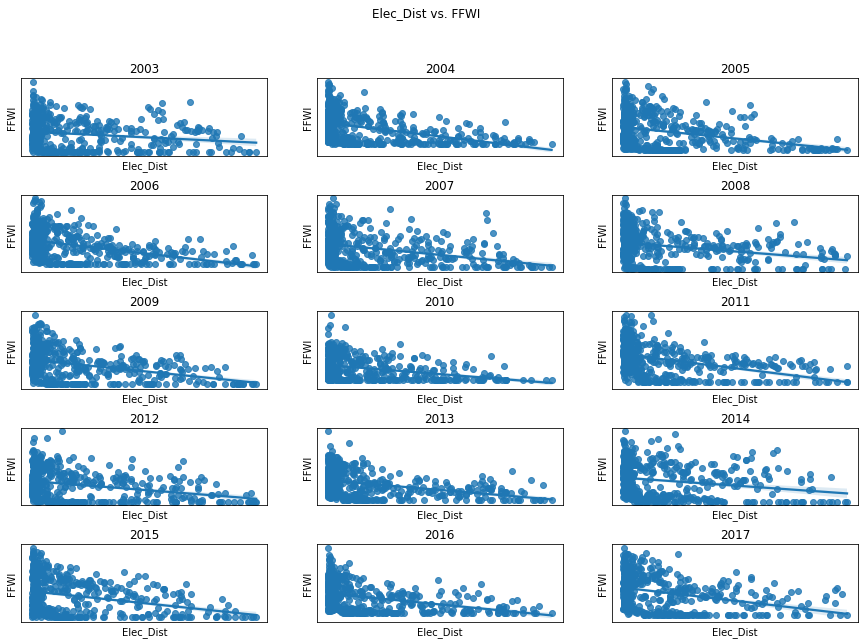

aet__maximum_Normal vs. FFWI scatter plots


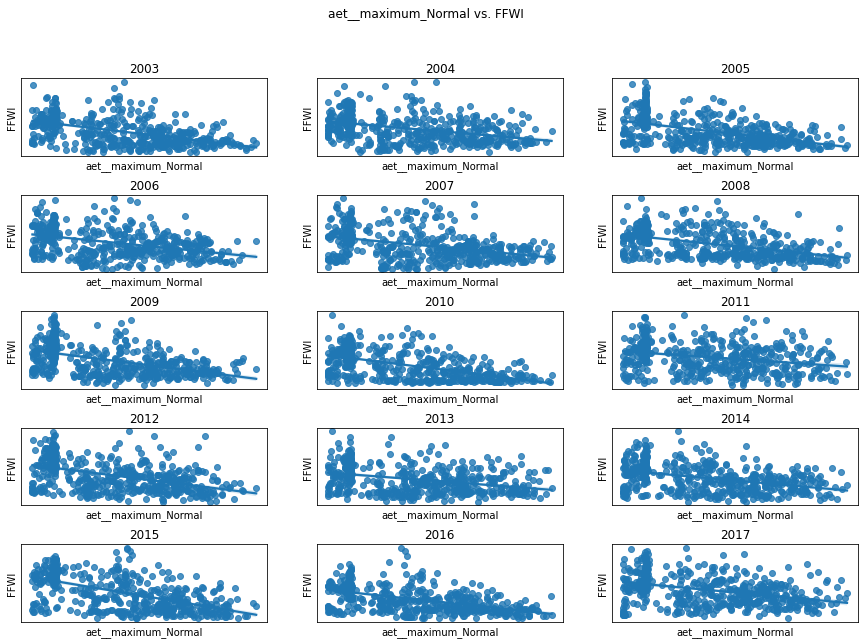

aet__mean_Normal vs. FFWI scatter plots


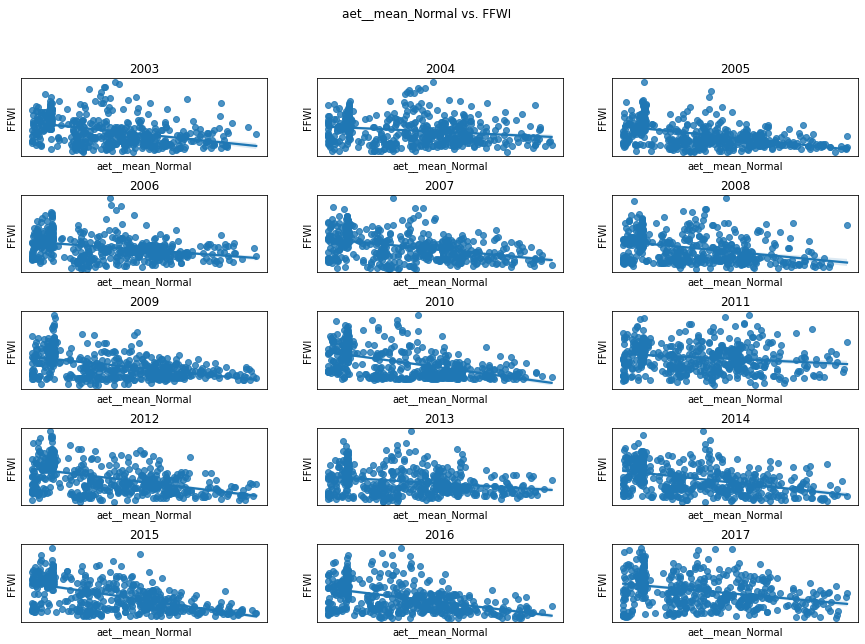

aet__minimum_Normal vs. FFWI scatter plots


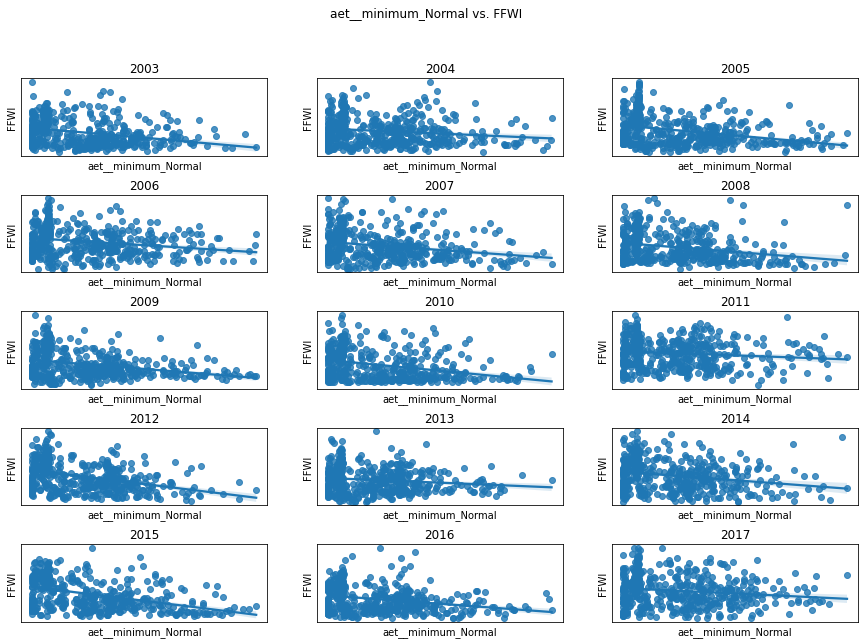

cwd__maximum_Normal vs. FFWI scatter plots


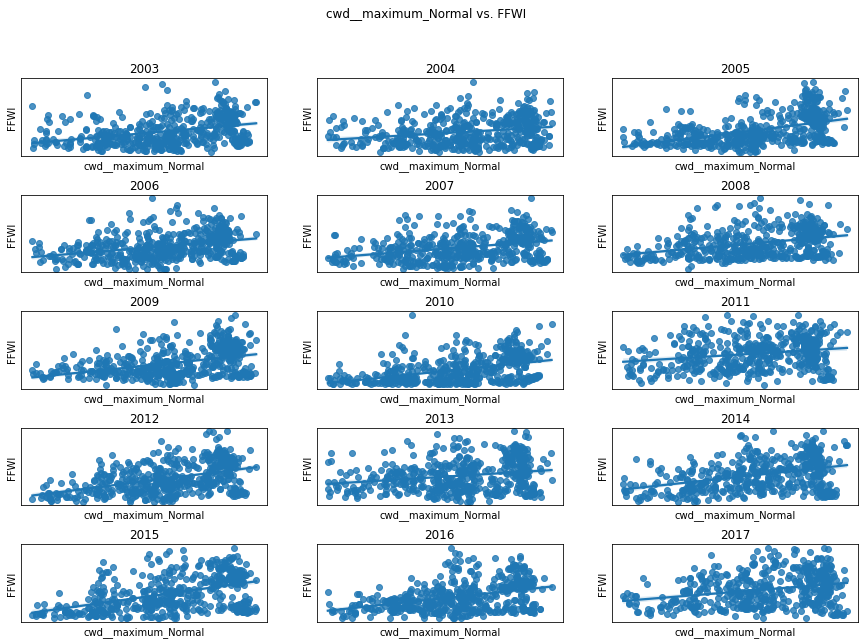

cwd__mean_Normal vs. FFWI scatter plots


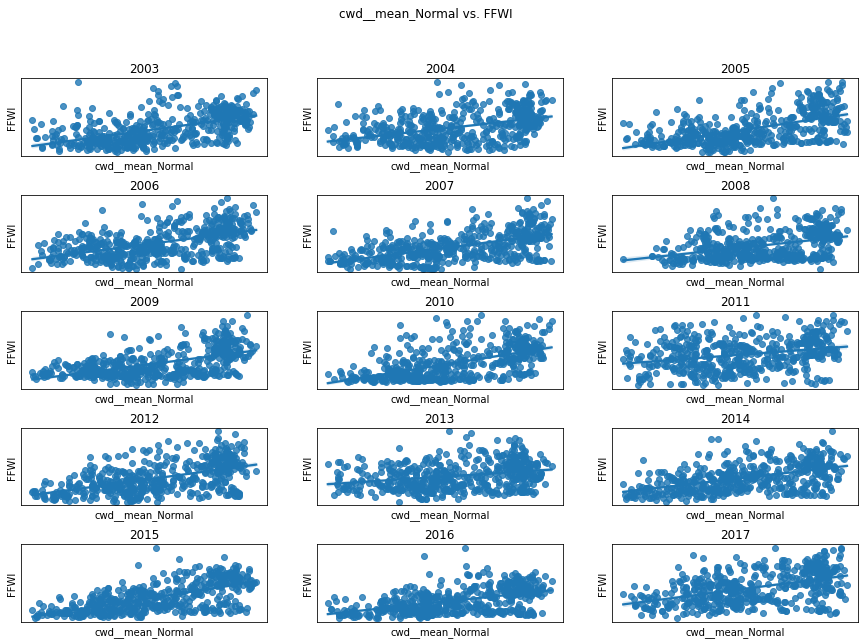

cwd__minimum_Normal vs. FFWI scatter plots


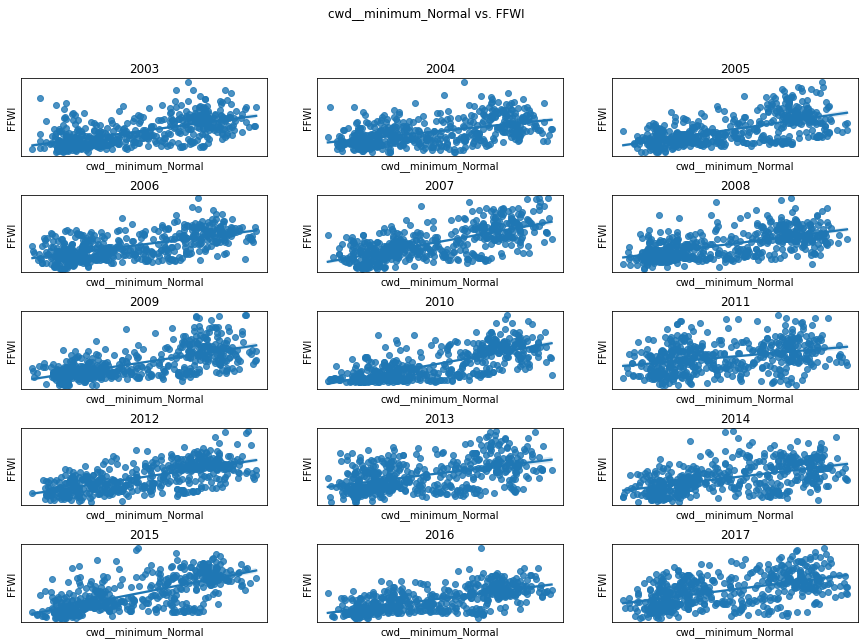

cwd__mean_ThreeYear_Dev vs. FFWI scatter plots


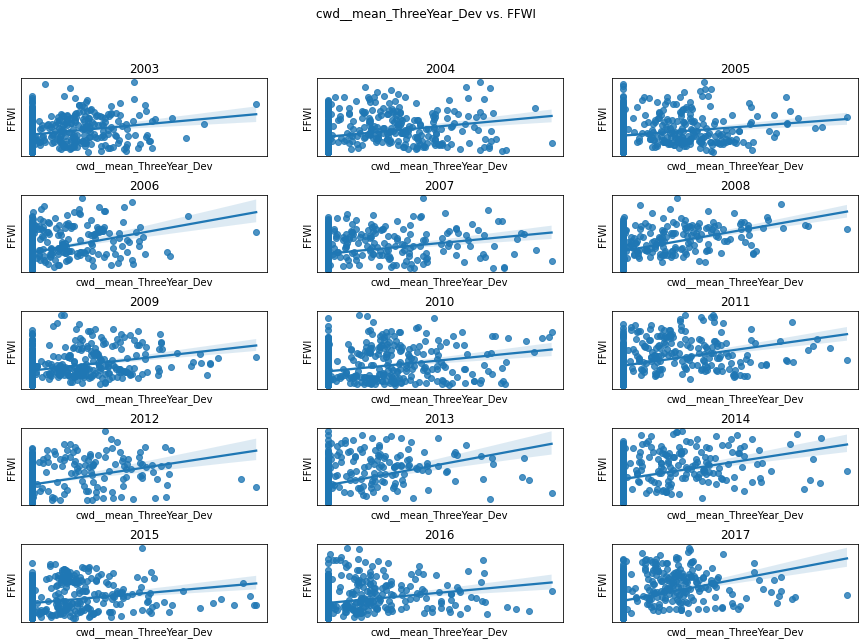

In [34]:
#features chosen based on the highest correlation coefficients
x_features = ['Elec_Dist',
'aet__maximum_Normal',
'aet__mean_Normal',
'aet__minimum_Normal',
'cwd__maximum_Normal',
'cwd__mean_Normal',
'cwd__minimum_Normal',
'cwd__mean_ThreeYear_Dev'
]

for feature in x_features:
    plot(feature, 'FFWI')

In [8]:
# Get average correlation between a feature and FFWI 

for feature in col_subset:
    x_feature = 'FFWI'
    y_feature = feature
    
    corr_avg = 0
    
    for name, df in dataframes.items():
        corr = get_correlation(df, x_feature, y_feature, verbose=False)
        corr_avg += corr
    
    print(f'Average correlation between {x_feature} and {y_feature} is {round(corr_avg/len(dataframes), 3)}')

Average correlation between FFWI and pixel_id is 0.527
Average correlation between FFWI and Road_Dist is 0.178
Average correlation between FFWI and Elec_Dist is -0.328
Average correlation between FFWI and Cultivated_Prop is -0.06
Average correlation between FFWI and aet__maximum_Normal is -0.424
Average correlation between FFWI and aet__mean_Normal is -0.395
Average correlation between FFWI and aet__minimum_Normal is -0.266
Average correlation between FFWI and cwd__maximum_Normal is 0.351
Average correlation between FFWI and cwd__mean_Normal is 0.467
Average correlation between FFWI and cwd__minimum_Normal is 0.582
Average correlation between FFWI and pck__maximum_Normal is -0.124
Average correlation between FFWI and pck__mean_Normal is -0.079
Average correlation between FFWI and aet__mean_ThreeYear_Dev is 0.169
Average correlation between FFWI and cwd__mean_ThreeYear_Dev is 0.317
Average correlation between FFWI and pck__minimum_Normal is 0.006
Average correlation between FFWI and Mea